In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.regressionplots import influence_plot

In [11]:
toyota=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [12]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [13]:
toyota.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

# Correlation Matrix

In [18]:
toyota_2=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota_2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [20]:
car=toyota_2.rename(columns={'Age_08_04':'age','Quarterly_Tax':'QuartTax'})
car

,Price,age,KM,HP,cc,Doors,Gears,QuartTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [21]:
car.describe()

,Price,age,KM,HP,cc,Doors,Gears,QuartTax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


# Correlation Matrix

In [22]:
car.corr()

,Price,age,KM,HP,cc,Doors,Gears,QuartTax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QuartTax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


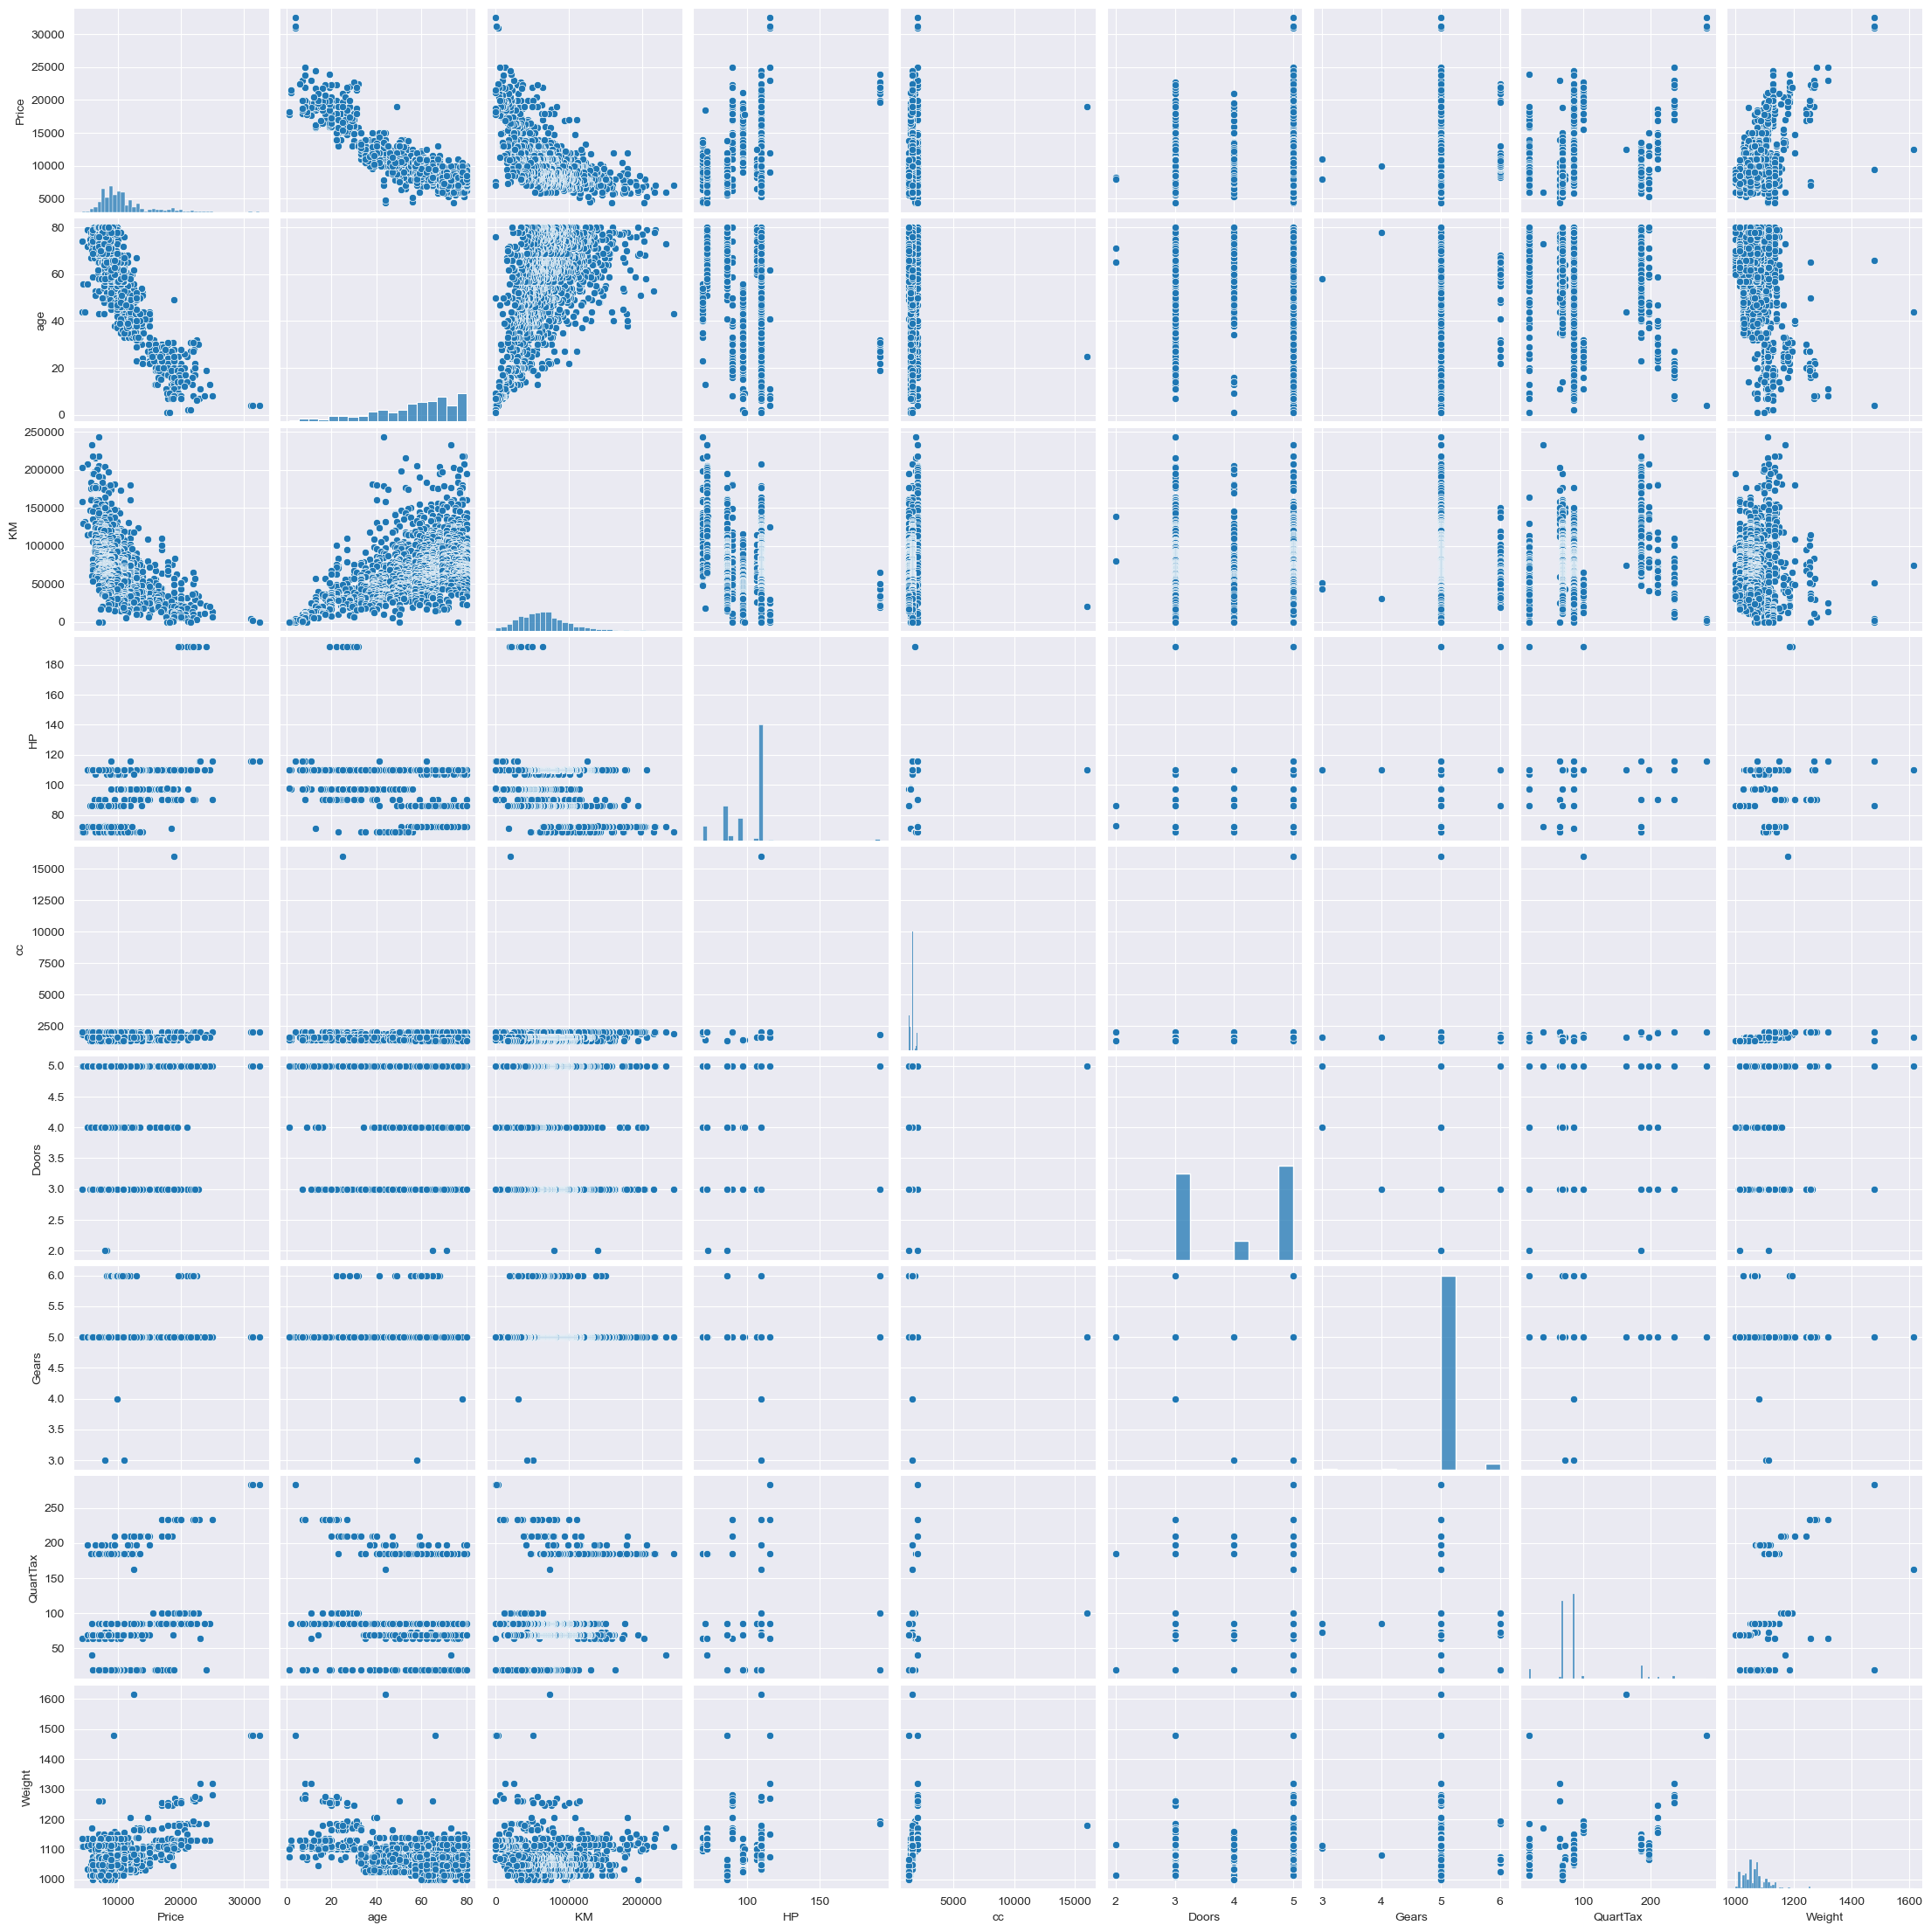

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(car)

# Model Bulid

In [27]:
import statsmodels.formula.api as smf
import statsmodels.api as sm 

In [28]:
model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+QuartTax+Weight',data=car).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:23:25   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QuartTax       3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Model Testing
model.params

Intercept   -5573.106358
age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
QuartTax        3.949081
Weight         16.958632
dtype: float64

In [32]:
slr_cc=smf.ols('Price~cc',data=car).fit()
slr_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.55e-06
Time:                        10:28:40   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
slr_doors=smf.ols('Price~cc+Doors',data=car).fit()
slr_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.15e-15
Time:                        10:29:29   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation 

Collinearity Check

In [36]:
# VIF = 1/(1-Rsquare) for all independent varibles
rsq_age=smf.ols('age~KM+HP+cc+Doors+Gears+QuartTax+Weight',data=car).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~age+HP+cc+Doors+Gears+QuartTax+Weight',data=car).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~age+KM+cc+Doors+Gears+QuartTax+Weight',data=car).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~age+KM+HP+Doors+Gears+QuartTax+Weight',data=car).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~age+KM+HP+cc+Gears+QuartTax+Weight',data=car).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~age+KM+HP+cc+Doors+QuartTax+Weight',data=car).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QuartTax=smf.ols('QuartTax~age+KM+HP+cc+Doors+Gears+Weight',data=car).fit().rsquared
vif_QuartTax=1/(1-rsq_QuartTax)

rsq_WT=smf.ols('Weight~age+KM+HP+cc+Doors+Gears+QuartTax',data=car).fit().rsquared
vif_WT=1/(1-rsq_WT)

In [37]:
d1={'Variables':['age','KM','HP','cc','Doors','Gears','QuartTax','Weight'],'vif':[vif_age,vif_CC,vif_DR,vif_GR,vif_HP,vif_KM,vif_QuartTax,vif_WT]}
vif_df=pd.DataFrame(d1)
vif_df

,Variables,vif
0,age,1.884620
1,KM,1.163894
2,HP,1.156575
3,cc,1.098723
4,Doors,1.419422
5,Gears,1.756905
6,QuartTax,2.311431
7,Weight,2.516420


# Residual Analysis

Q-Q Plot

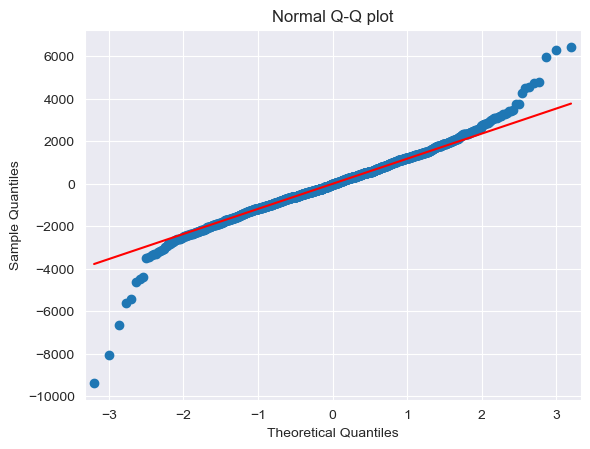

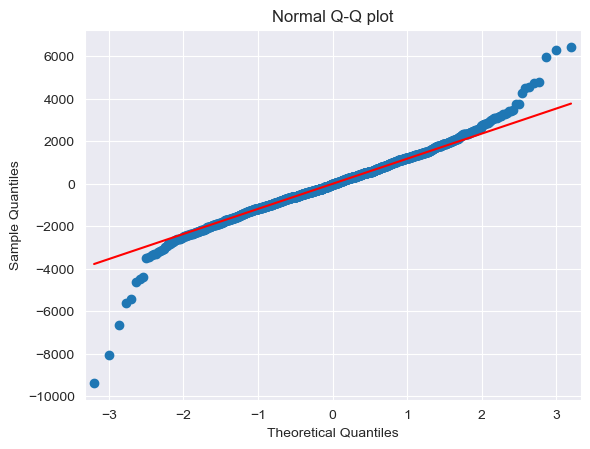

In [39]:
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot')
plt.show()

In [42]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [43]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

# Residual plot for Homoscedasticity

In [44]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

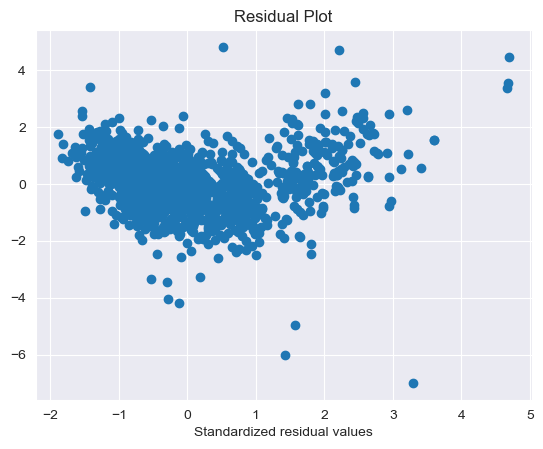

In [45]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized residual values')
plt.show()

# Residual vs Regressors

eval_env: 1


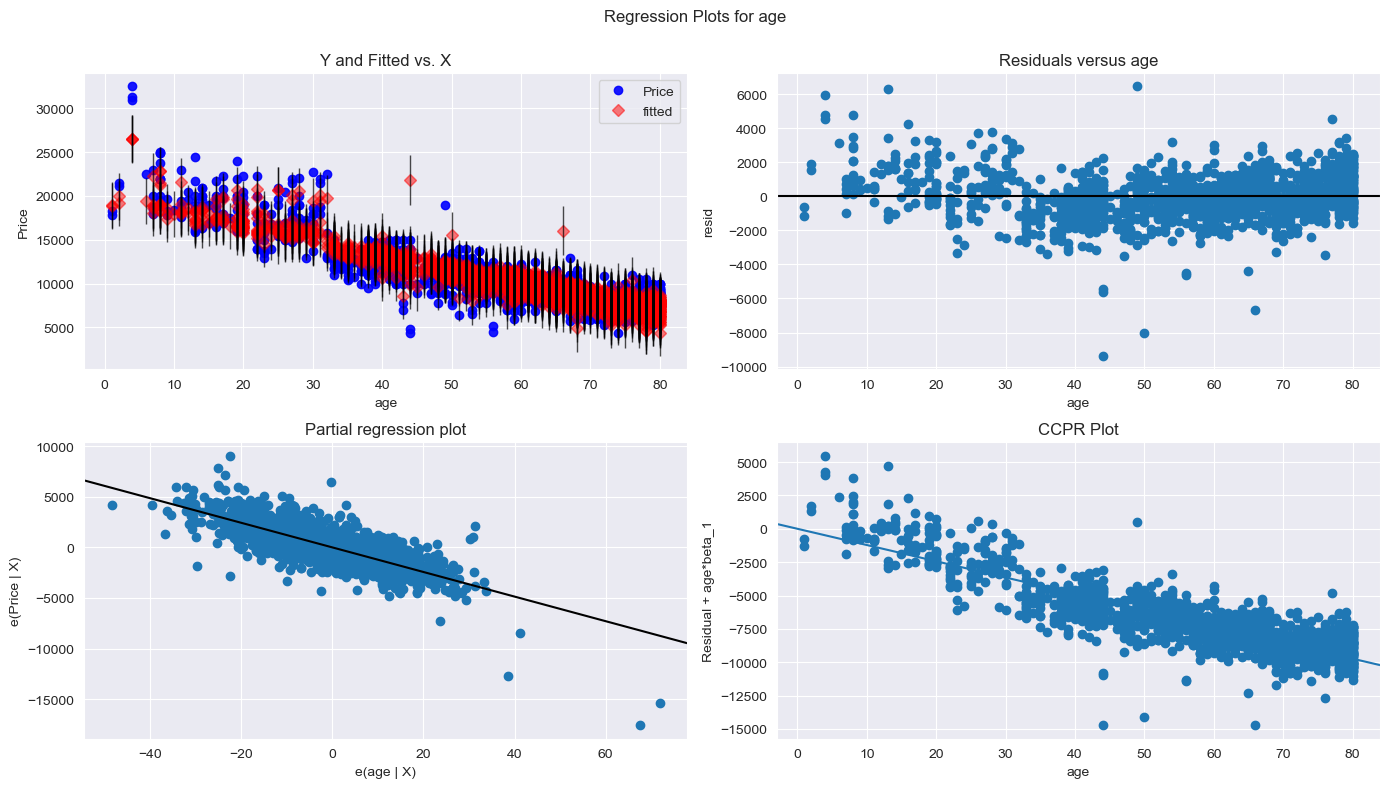

In [48]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show()

eval_env: 1


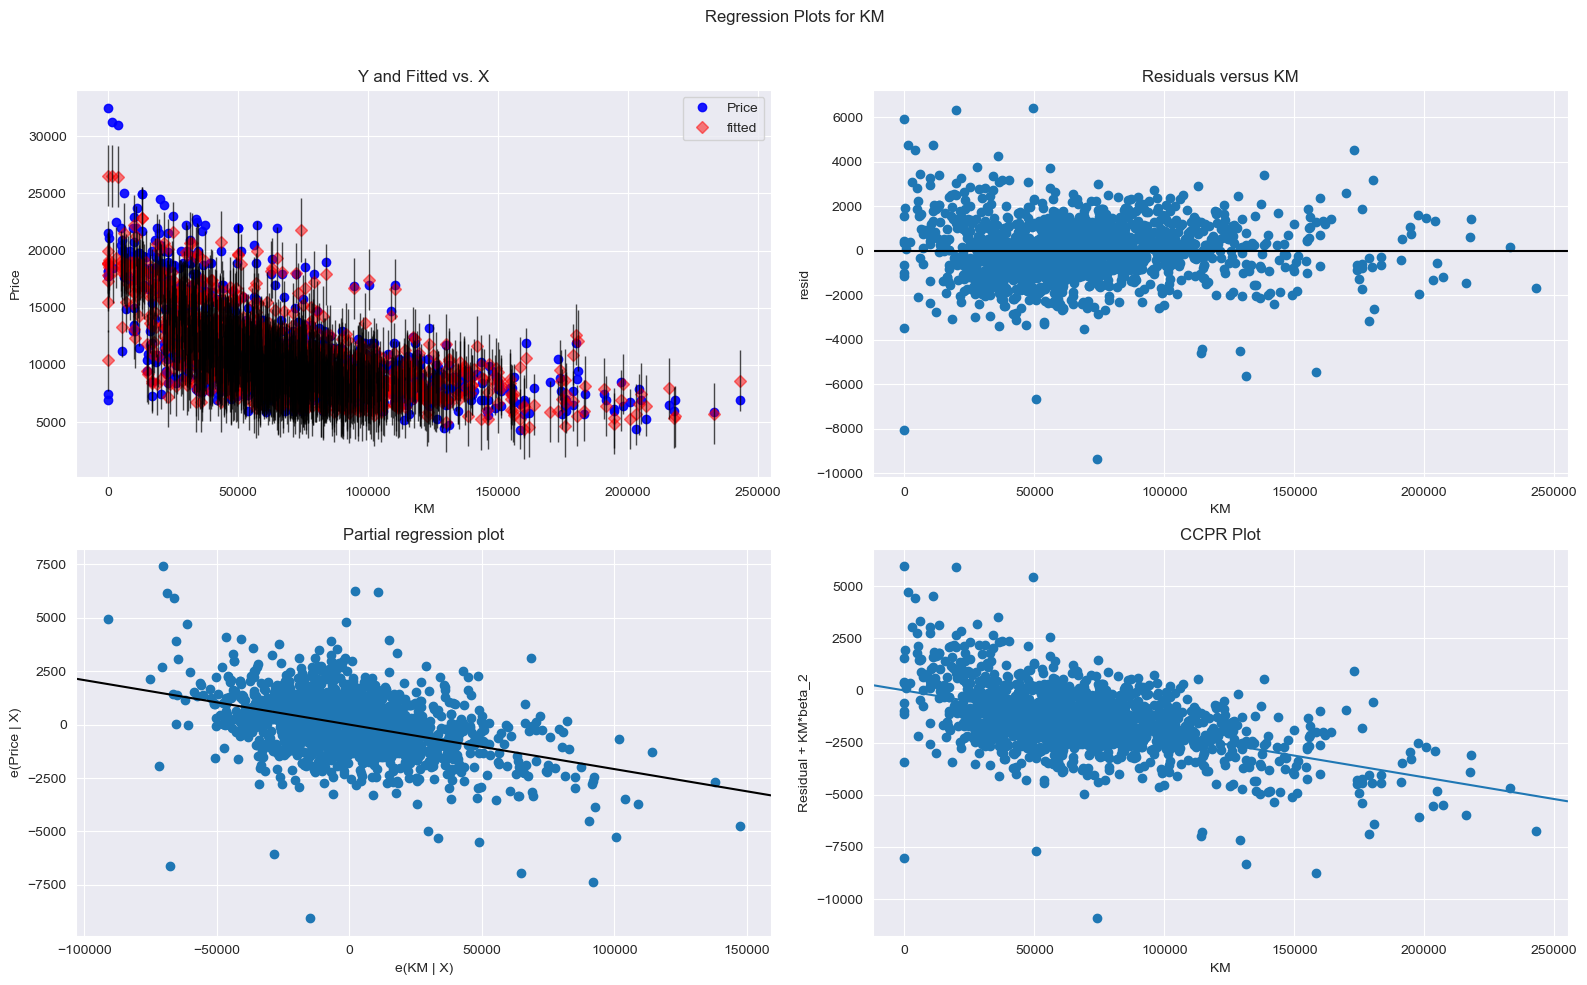

In [56]:
fig=plt.figure(figsize=(16,10))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


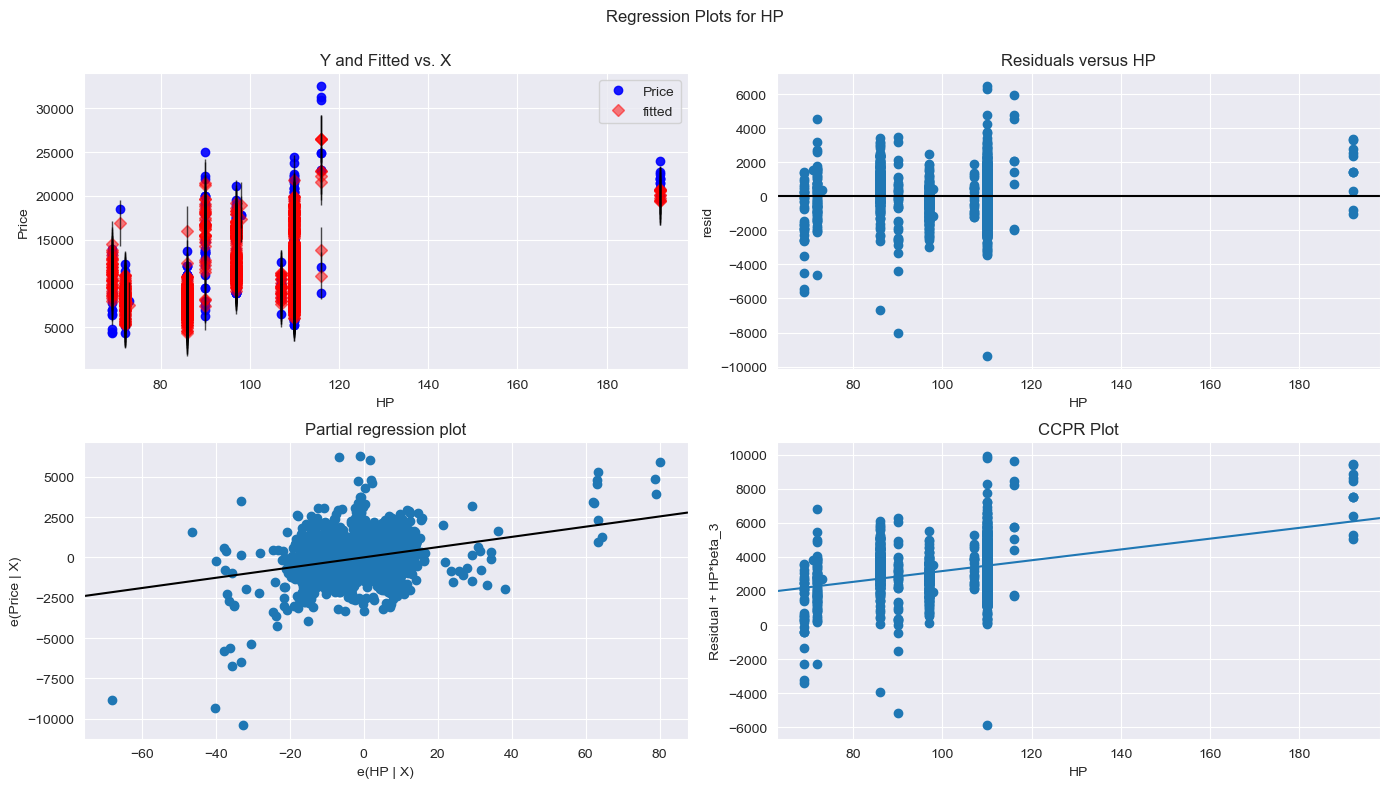

In [57]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


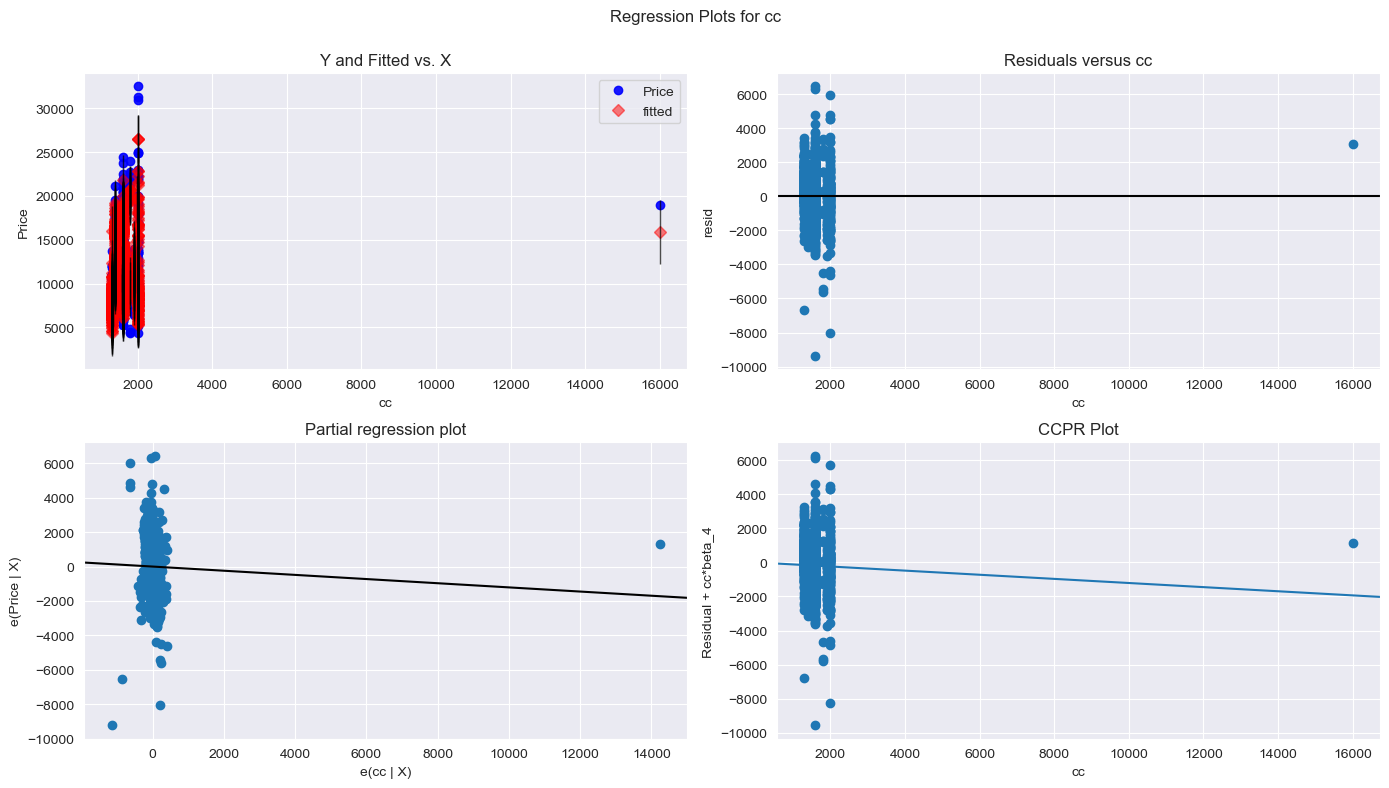

In [58]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


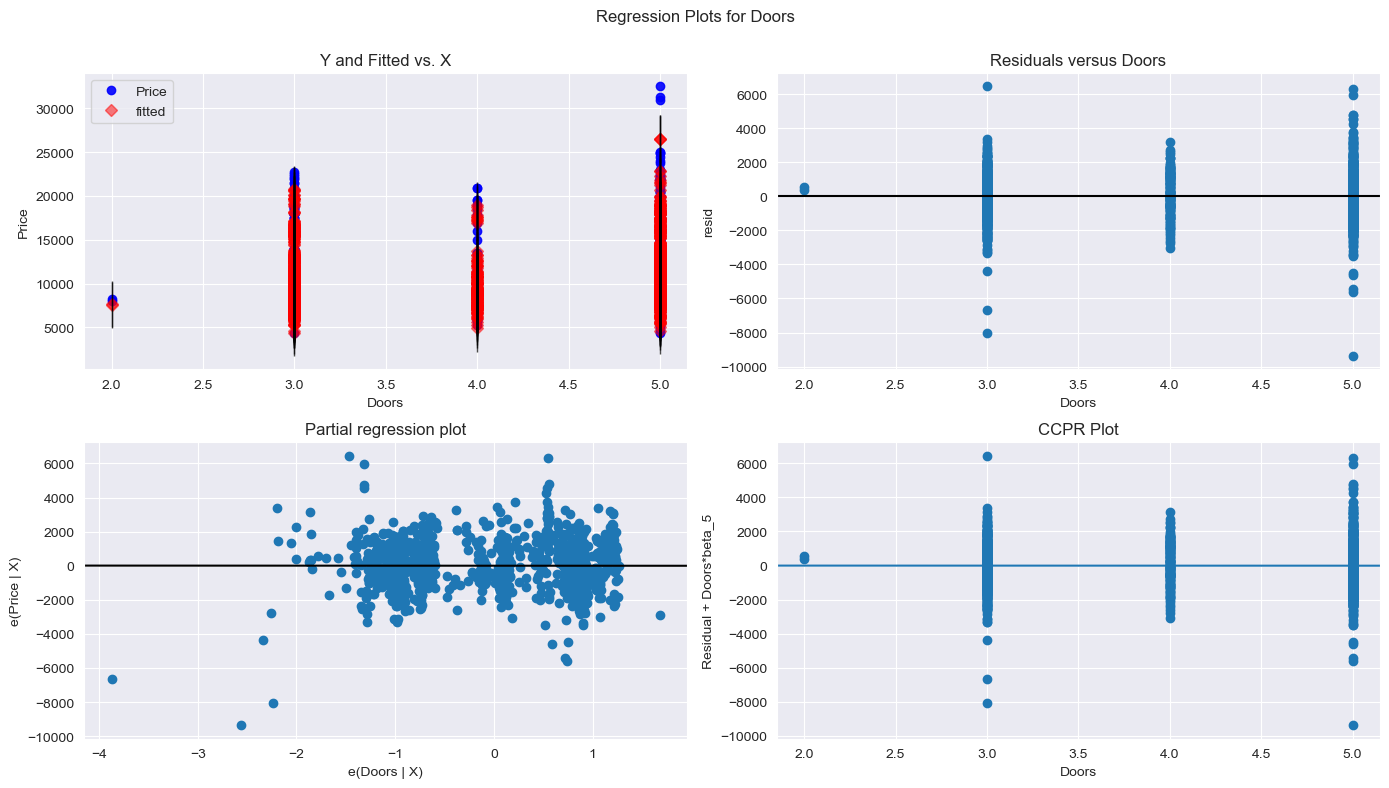

In [59]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


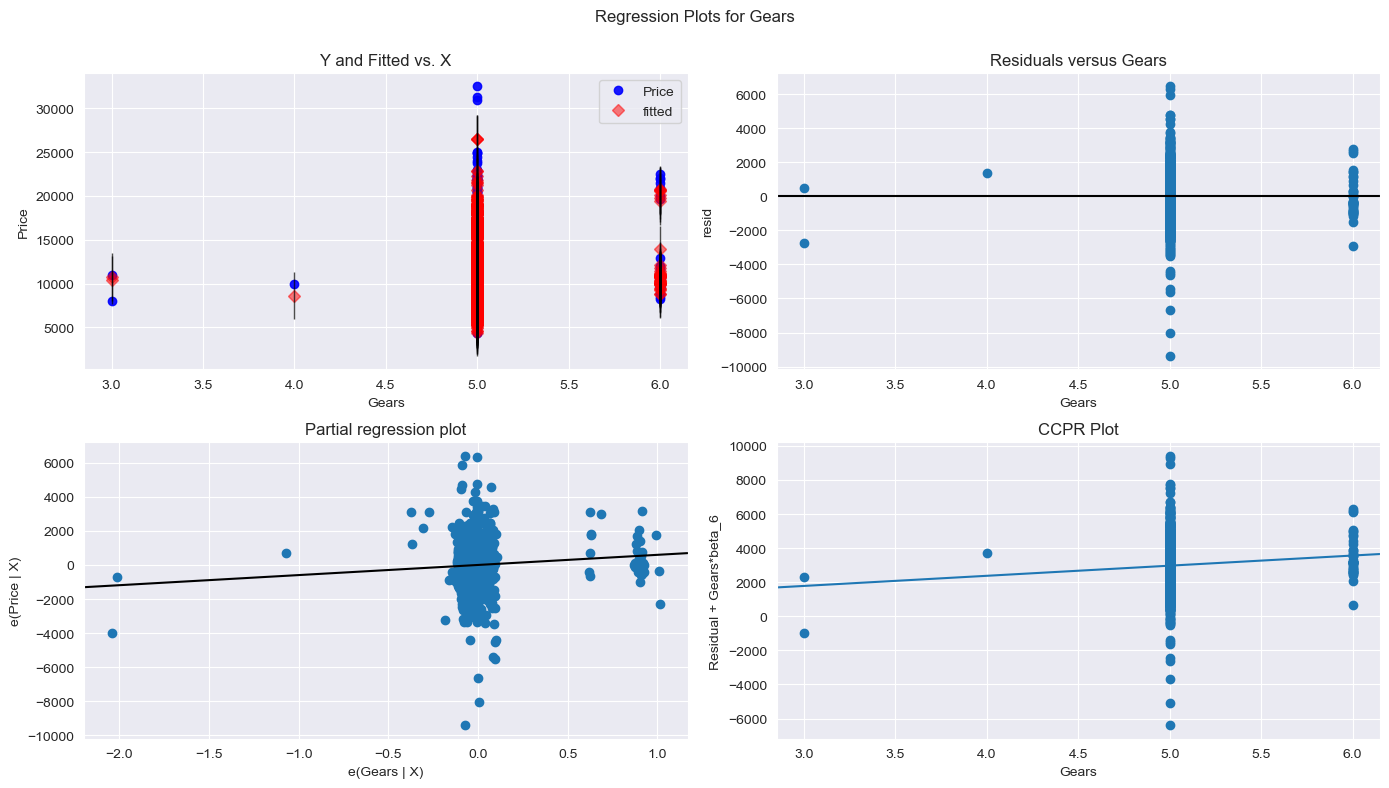

In [60]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


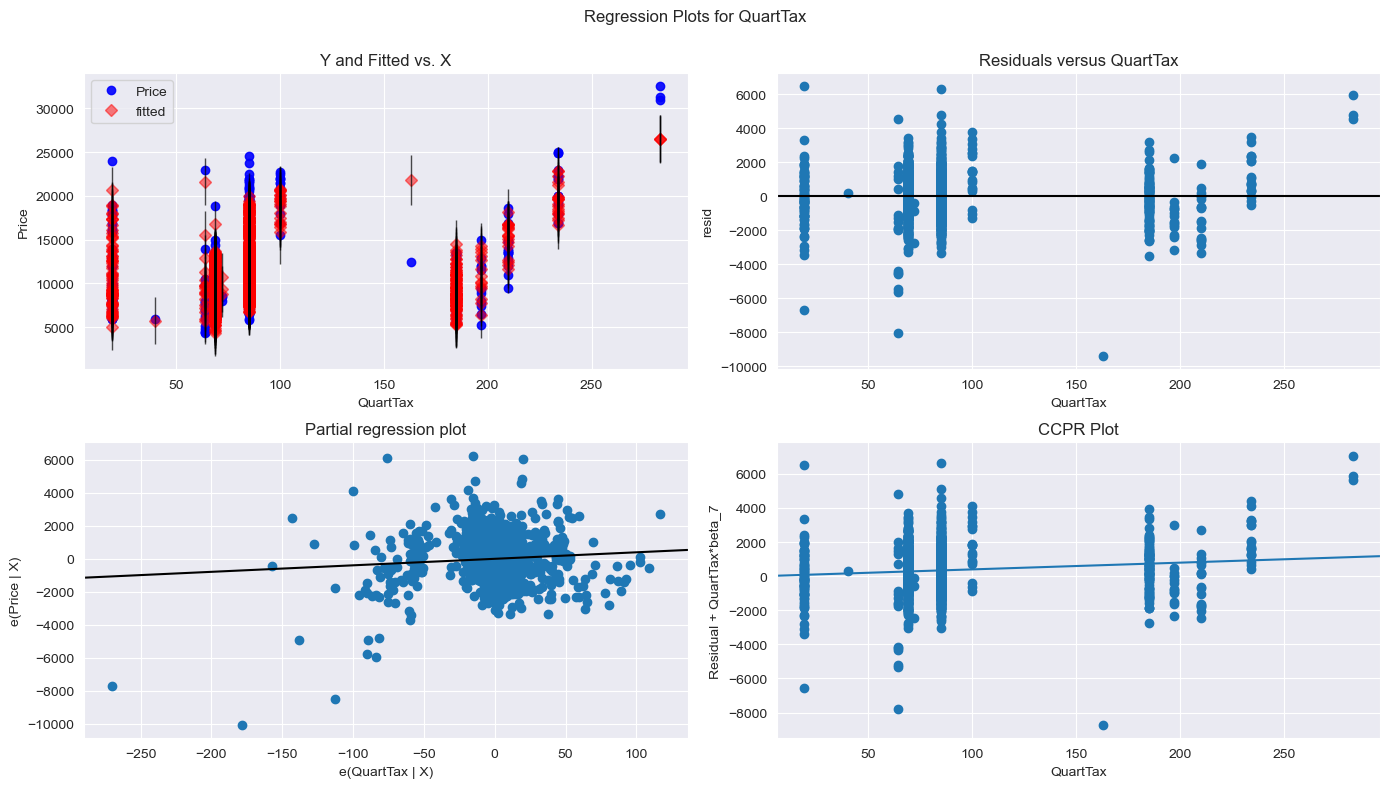

In [61]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'QuartTax',fig=fig)
plt.show()

eval_env: 1


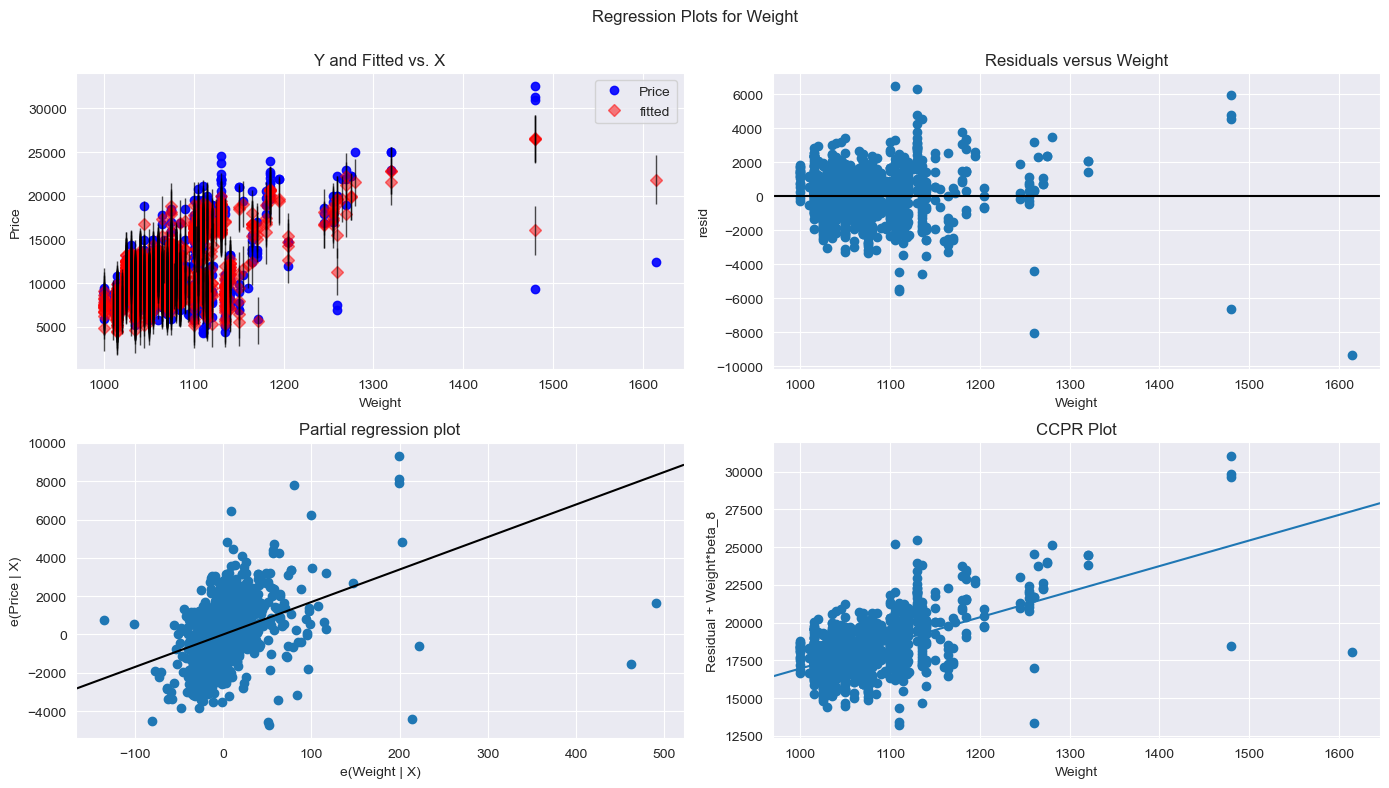

In [62]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion(checking outliers)
COOKS DISTANCE

In [63]:
(c,_)=model.get_influence().cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

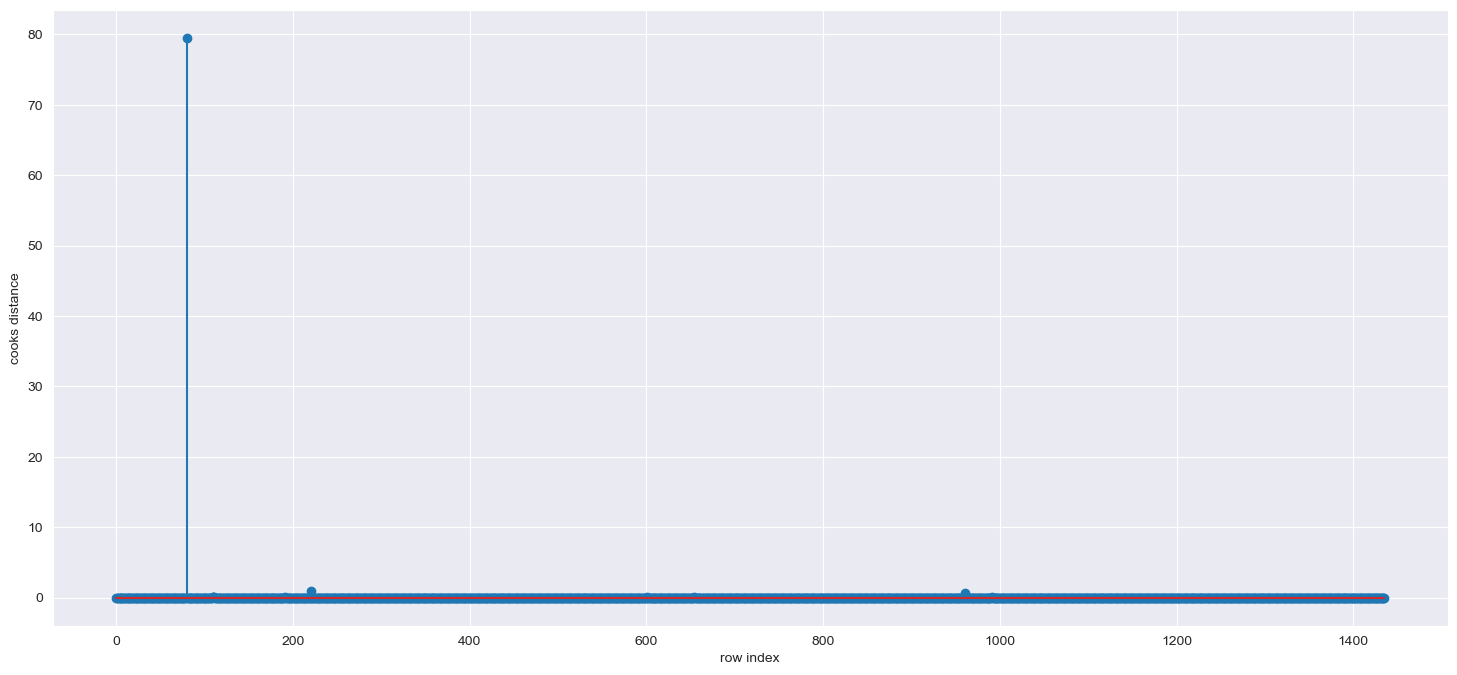

In [71]:
# Steam plot
fig=plt.figure(figsize=(18,8))
plt.stem(np.arange(len(car)),np.round(c,4))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [72]:
np.argmax(c),np.max(c)

(80, 79.52010624138181)

# High Influence points

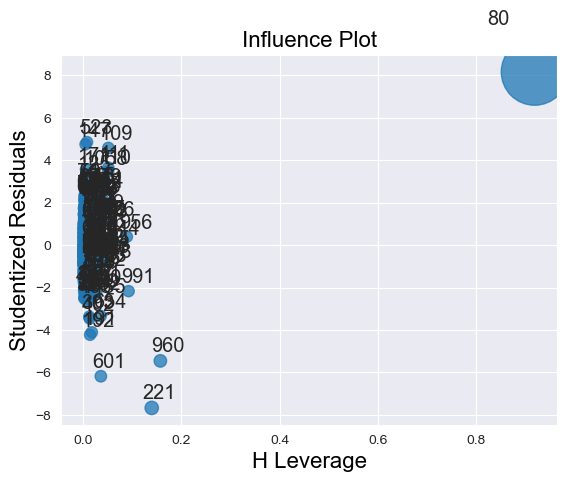

In [73]:
influence_plot(model)
plt.show()

Leverage Cuttoff

In [75]:
#leverage Cutoff=3*(k+1)/n 
k=car.shape[1]
n=car.shape[0]
leverage_cutoff=(3*(k+1))/n 
leverage_cutoff

0.020891364902506964

In [76]:
car[car.index.isin([80])]

,Price,age,KM,HP,cc,Doors,Gears,QuartTax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving Model

In [78]:
car_dup=car.copy()
car_dup

,Price,age,KM,HP,cc,Doors,Gears,QuartTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [79]:
car1=car_dup.drop(car_new.index[[80]],axis=0).reset_index(drop=True)
car1

,Price,age,KM,HP,cc,Doors,Gears,QuartTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Final Model

In [80]:
model=smf.ols('Price~age+KM+HP+cc+Gears+QuartTax+Weight',data=car1).fit()
(c,_)=model.get_influence().cooks_distance
c 

array([6.55389760e-03, 3.41592491e-03, 4.77721092e-03, ...,
       2.56004891e-06, 9.44753606e-04, 1.08034832e-02])

In [81]:
np.argmax(c),np.max(c)

(220, 2.3034451664541633)

In [82]:
car1=car1.drop(car1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
car1

,Price,age,KM,HP,cc,Doors,Gears,QuartTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [86]:
final_model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+QuartTax+Weight',data=car1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:39:16   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
age         -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM            -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP            39.2932      2.816     13.953      0.000      33.769      44.817
cc            -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors        -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears        485.0462    186.602      2.599      0.009     119.001     851.091
QuartTax       7.9664      1.382      5.762      0.000       5.254      10.678
Weight        25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
final_model.aic

24574.7766156388

# Model Prediction

In [89]:
pred_car=pd.DataFrame({'age':24,'KM':2000,'HP':30,'cc':1200,'Doors':5,'Gears':3,'QuartTax':130,'Weight':1020},index=[0])
pred_car

,age,KM,HP,cc,Doors,Gears,QuartTax,Weight
0,24,2000,30,1200,5,3,130,1020


In [90]:
final_model.predict(pred_car)

0    11961.495289
dtype: float64

In [91]:
pred_y=final_model.predict(car1)
pred_y

0       16464.269143
1       16015.934400
2       16438.822844
3       16097.016263
4       15920.074311
            ...     
1429     9015.088083
1430     8441.533328
1431     8592.387585
1432     8710.693475
1433    10235.621866
Length: 1434, dtype: float64